# **Emotion Recognition Classification Task**

In [1]:
#Python's operating system interface
import os
#Python time-related functions
import time
#Python module for manipulating dates and times
import datetime 
#a Python numerical computing library
import numpy as np 
#a Python data manipulation and analysis library
import pandas as pd
#a Python package for making visualisations
import matplotlib.pyplot as plt


#a Python package that provides several machine learning methods and tools
import sklearn


#Google's open-source platform for developing and training machine learning models
%tensorflow_version 2.x
#Python API for high-level neural networks that runs on top of TensorFlow and other lower-level deep learning frameworks
import tensorflow as tf
#Python module that provides numerous functions for interacting with functions
from tensorflow import keras

%load_ext tensorboard

#Python module that provides numerous functions for interacting with functions
from functools import partial
#Python module for making statistical graphics
import seaborn as sns

#a Keras class that generates batches of enhanced picture data during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''Dense is a neural network layer that is fully connected.
A model's input shape is defined by input.
Dropout is a regularisation technique that helps to avoid overfitting.
Flatten is a function that converts the output of a convolutional layer into a vector.
Conv2D is a 2D convolutional layer used in image processing and computer vision for feature extraction.'''
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
'''BatchNormalization is a Keras layer that is used to normalise inputs to a layer.
Activation is a Keras layer that specifies the activation function.
MaxPooling2D is a Keras layer that implements maximum pooling.'''
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
'''It imports the Model and Sequential classes from TensorFlow's tensorflow.keras.models module, which are used to build neural network models.'''
from tensorflow.keras.models import Model, Sequential
#a stochastic gradient descent Keras optimizer
from tensorflow.keras.optimizers import Adam
'''This piece of code imports two callback classes from TensorFlow's tensorflow.keras.callbacks package, ModelCheckpoint and ReduceLROnPlateau.'''
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#import plot_model from tensorflow.keras.utils
from tensorflow.keras.utils import plot_model
#importing Sequential class from keras.model
from keras.models import Sequential 
#importing Reshape to reshape the images
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
#NumPy-to-Keras data transformation.
from keras.utils import np_utils

#Importing TensorFlow machine learning library.
import tensorflow as tf
import pandas as pd


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#Importing visualization functions from Matplotlib.
from matplotlib import pyplot

In [3]:
'''This code block installs PyDrive and imports the modules required to access Google Drive files. The user is then authenticated, and a PyDrive client is created to download a file from Google Drive using the file's unique ID. Finally, the downloaded file is saved with the name you specify.'''
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1za6RekuOq7IHDUmiVgsIDqf7YhLTD4hK/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('my_emotion_train.csv') 
 
 #This line of code reads a CSV file named'my_emotion_train.csv' and saves the contents as a dataframe object 'df' using the pandas library.
df = pd.read_csv('my_emotion_train.csv')
print(df)

          id  emotion                                             pixels
0       9415        6  29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1      19109        3  126 154 167 181 188 194 195 194 196 195 198 20...
2      21523        2  169 220 218 208 184 144 72 73 143 183 203 210 ...
3       2076        3  60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4      13957        3  174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...
...      ...      ...                                                ...
28995   7926        5  54 49 35 32 27 32 39 41 61 85 100 107 114 121 ...
28996  21200        3  101 107 111 90 95 129 134 139 152 132 126 135 ...
28997   1097        3  133 113 120 151 178 199 209 215 216 221 221 22...
28998   4186        3  65 63 63 54 58 58 49 54 62 60 56 61 57 57 58 5...
28999   8701        2  23 19 22 21 21 22 24 24 26 27 28 32 38 57 74 7...

[29000 rows x 3 columns]


In [4]:

#These two lines of code are initializing the 'labels' and 'pixels' variables for further processing of the data.
labels=df['emotion']
pixels=np.zeros((df.shape[0], 48*48))

In [5]:
#This line allocates the DataFrame 'df''s 'pixels' column to a variable called 'tem'.
tem=df['pixels']

In [6]:
#This function converts the pixel values from string to integer format and stores them in a 2D numpy array called 'pixels'.
for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])

In [7]:
#This will return the array pixels' form. The shape will be a tuple of the form (n, m), where n indicates the number of rows in the 2D array pixels and m represents the number of columns.
pixels.shape

(29000, 2304)

In [8]:
#This is the process of standardising or normalising a pixel array to have a zero mean and a unit standard deviation.
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)

In [9]:
#Reshape pixels array to 4D for CNN input.
pixels=pixels.reshape(29000,48,48,1)

In [10]:
#Convert labels to categorical format.
labels=labels.astype('category')

In [11]:
#This code splits the data into training and validation sets.
X_train=pixels[:27000]
y_train=labels[:27000]
X_val=pixels[27000:]
y_val=labels[27000:]


In [12]:
#Returns the shape of y_val.
y_val.shape

(2000,)

In [13]:
#Converts labels to one-hot encoded arrays.
y_train = tf.one_hot(y_train, depth=7)
y_val=tf.one_hot(y_val,depth=7)
y_train=np.array(y_train)
y_val=np.array(y_val)

In [14]:
#The geometry of the numpy array X_train is returned by this code snippet.
X_train.shape

(27000, 48, 48, 1)

In [15]:
#X_train and X_val arrays are reshaped to 4D arrays with dimensions (number of samples, height, breadth, and channels).
X_train = np.reshape(X_train,(-1,48,48,1))

X_val = np.reshape(X_val,(-1,48,48,1))


In [16]:
#Displays shape of X_val array.
X_val.shape

(2000, 48, 48, 1)

In [17]:
##Displays shape of y_val array.
y_val.shape

(2000, 7)

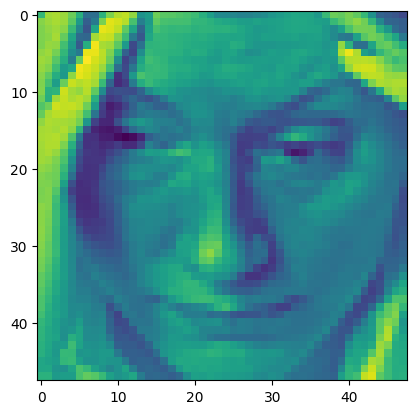

In [23]:
#Displays the image of the third sample. 
from matplotlib import pyplot
pyplot.imshow(pixels[2])

In [18]:
#The shape of pixels[2] is (48, 48).
pixels[2].shape

(48, 48, 1)

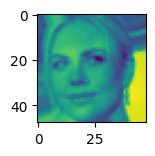

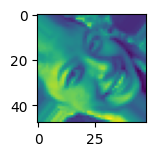

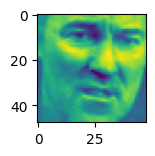

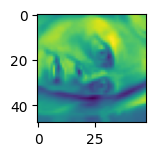

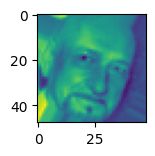

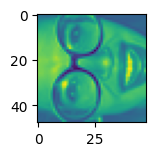

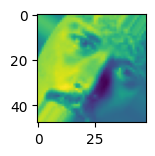

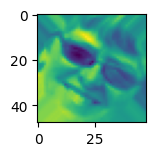

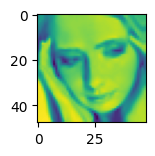

In [19]:
#This programme develops an image data generator, fits it to the training data, generates augmented data, and shows a set of random rotation images.
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train,y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(48, 48, 1))
        pyplot.show()
    break

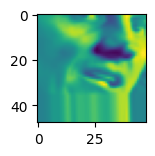

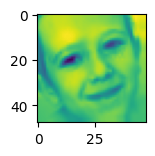

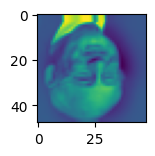

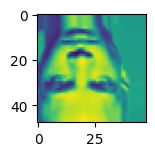

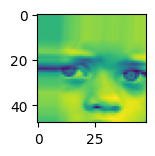

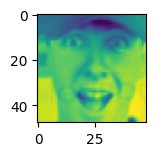

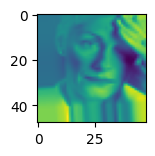

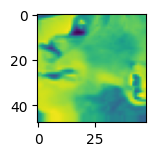

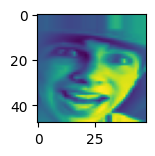

In [20]:
#This code employs Keras' ImageDataGenerator function to build augmented images from training data by applying various transformations such as rotations, shifts, shear, zoom, and flips, and then shows a batch of 9 altered images.
from matplotlib import pyplot
datagen = ImageDataGenerator(rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
datagen.fit(X_train)
for X_batch1, y_batch1 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch1[i].reshape(48, 48, 1))
        pyplot.show()
    break

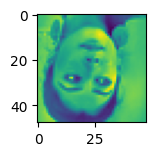

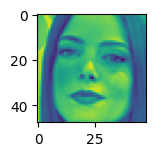

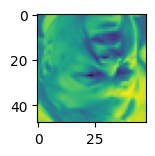

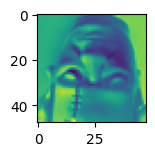

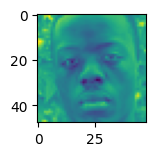

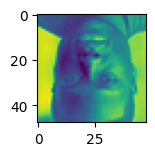

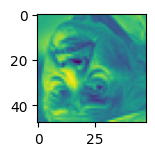

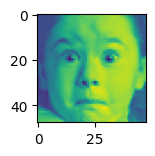

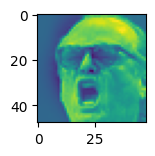

In [21]:
'''The ImageDataGenerator function from the Keras package is used in this code to supplement data. It specifically flips the training data horizontally and vertically, resulting in an enhanced number of training examples with slightly varying orientations. The for loop iterates over batches of enhanced data (X_batch2) and associated labels (y_batch2), presenting a 3x3 grid of randomly picked photos using the Matplotlib library's pyplot.imshow function. The break statement ensures that the loop only loops over the initial batch of augmented data once.'''
from matplotlib import pyplot
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)
for X_batch2, y_batch2 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch2[i].reshape(48, 48, 1))
        pyplot.show()
    break

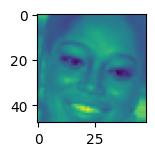

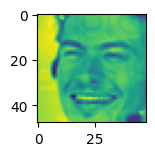

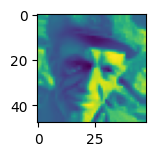

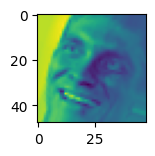

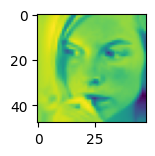

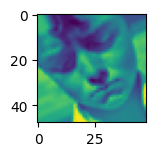

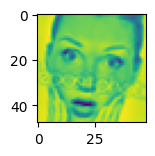

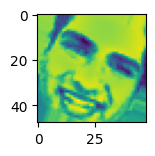

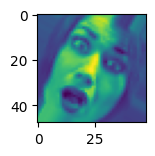

In [ ]:
'''This method generates batches of augmented data with random rotations applied to them by creating an instance of ImageDataGenerator with a rotation range of 30 degrees, fitting it to the training data, and then generating batches of augmented data with random rotations added to them. The augmented photos are displayed in a 3x3 grid using pyplot.imshow. The loop terminates after the first batch of data is generated.'''
datagen = ImageDataGenerator(rotation_range=30)
datagen.fit(X_train)
for X_batch5, y_batch5 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch5[i].reshape(48, 48, 1))
        pyplot.show()
    break

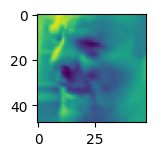

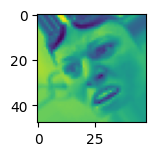

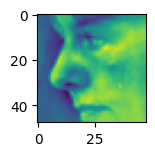

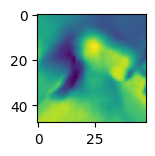

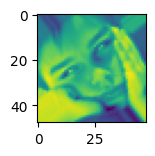

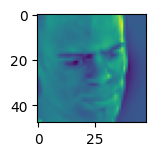

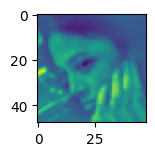

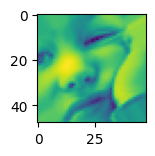

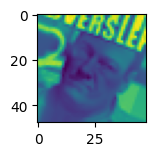

In [ ]:
#Using ImageDataGenerator, this code augments the picture data by rotating the images at a 45-degree angle. The function adapts the generator to the training data and produces a fresh set of augmented images. Following that, the code displays 9 augmented images.
datagen = ImageDataGenerator(rotation_range=45)
datagen.fit(X_train)
for X_batch6, y_batch6 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch6[i].reshape(48, 48, 1))
        pyplot.show()
    break

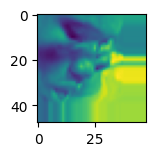

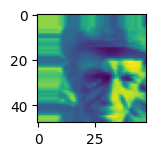

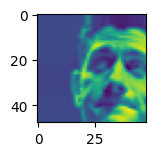

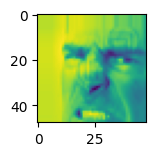

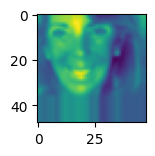

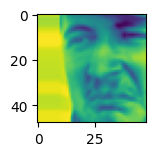

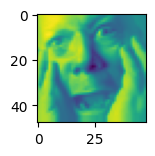

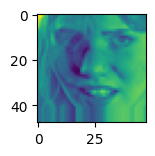

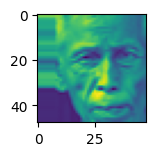

In [ ]:
#This code defines an image data generator that applies random horizontal and vertical shifts to the training data. The datagen.fit() function is used to calculate the required statistics. Then, datagen.flow() generates batches of augmented data and the for loop displays a sample of 9 images from the batch.
datagen = ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3)
datagen.fit(X_train)
for X_batch7, y_batch7 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch7[i].reshape(48, 48, 1))
        pyplot.show()
    break

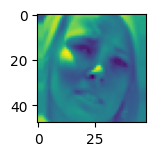

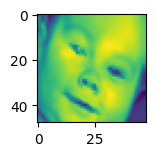

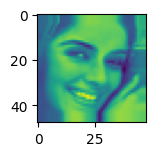

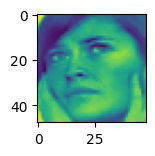

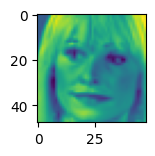

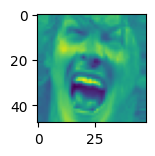

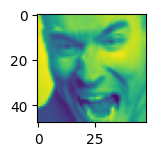

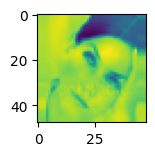

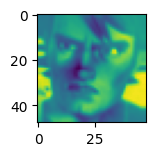

In [ ]:
#Using the zoom_range option of the ImageDataGenerator function, this code zooms in on the photos in the training set. pyplot.imshow() is then used to display the enhanced images.
from matplotlib import pyplot
datagen = ImageDataGenerator(zoom_range=0.2)
datagen.fit(X_train)
for X_batch8, y_batch8 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch8[i].reshape(48, 48, 1))
        pyplot.show()
    break

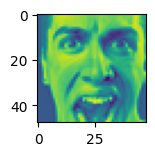

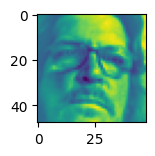

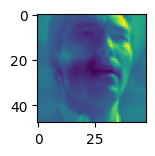

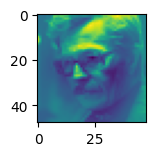

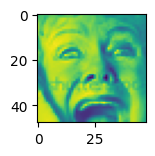

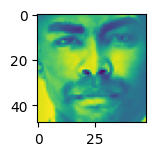

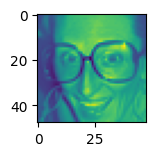

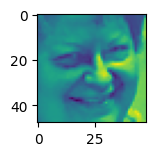

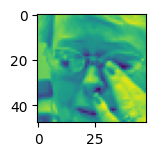

In [ ]:
#Image brightness augmentation.
from matplotlib import pyplot
datagen = ImageDataGenerator(brightness_range=[0.5,1])
datagen.fit(X_train)
for X_batch9, y_batch9 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch9[i].reshape(48, 48, 1))
        pyplot.show()
    break

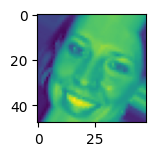

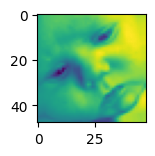

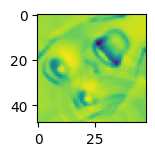

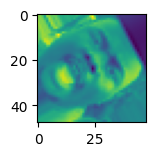

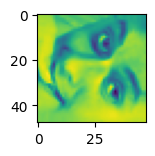

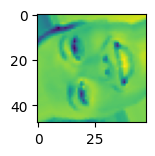

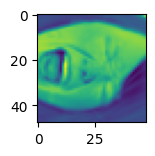

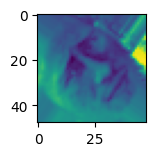

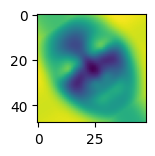

In [ ]:
#This code creates an ImageDataGenerator that rotates images randomly up to 125 degrees, fits it to the training data, generates augmented image batches on the fly using flow(), and displays 9 samples of the augmented images using Matplotlib.
datagen = ImageDataGenerator(rotation_range=125)
datagen.fit(X_train)
for X_batch10, y_batch10 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch10[i].reshape(48, 48, 1))
        pyplot.show()
    break

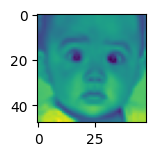

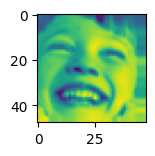

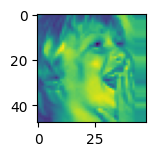

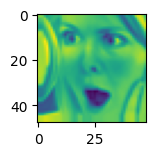

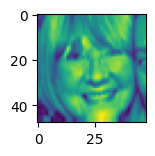

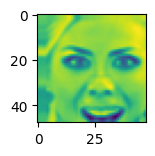

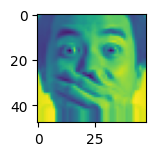

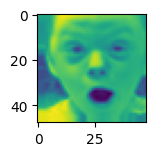

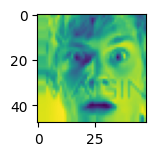

In [ ]:
#This code creates an instance of ImageDataGenerator with horizontal and vertical shift ranges of 0.1. Then it fits the generator to the training data, and generates augmented images in batches of 100000 using the flow method. Finally, it displays a grid of 9 augmented images using pyplot.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)
for X_batch11, y_batch11 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch11[i].reshape(48, 48, 1))
        pyplot.show()
    break

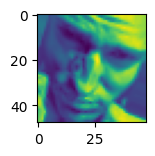

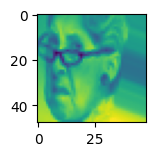

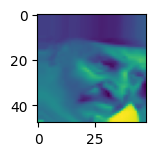

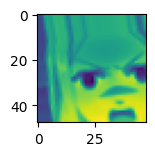

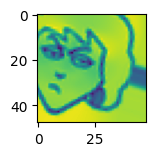

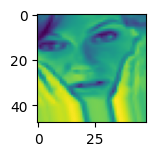

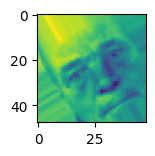

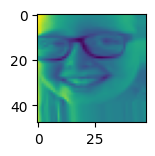

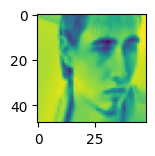

In [22]:

#Several data augmentation approaches are used in this code, which makes use of Keras' ImageDataGenerator function. These methods include rotation, shifting, shearing, zooming, horizontal flipping, and data filling. It then generates and shows enhanced images in 9-bit batches.
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
datagen.fit(X_train)
for X_batch12, y_batch12 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch12[i].reshape(48, 48, 1))
        pyplot.show()
    break

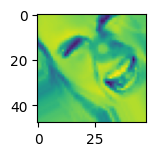

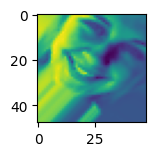

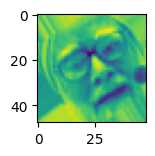

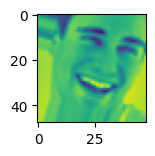

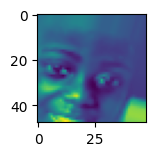

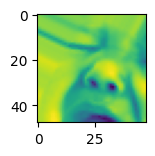

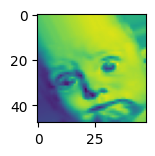

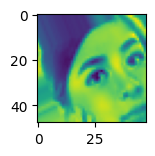

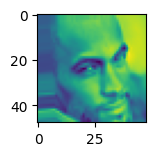

In [ ]:
#ImageDataGenerator is used in the code to apply data augmentation techniques to the training set. The photos are rotated, shifted, sheared, zoomed, horizontally flipped, and filled after the pixel values are rescaled to between 0 and 1. Finally, it employs pyplot to display a collection of augmented photos. However, there appears to be a typo in the final line, where it is attempting to display X_batch12 rather than X_batch13.
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=62,
      width_shift_range=0.1,                
      height_shift_range=0.1,
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
datagen.fit(X_train)
for X_batch13, y_batch13 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch12[i].reshape(48, 48, 1))
        pyplot.show()
    break

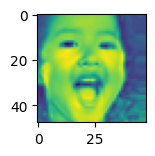

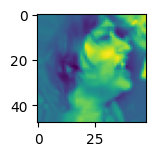

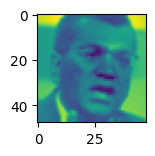

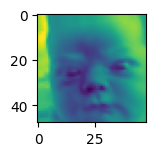

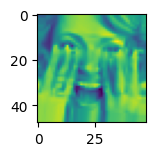

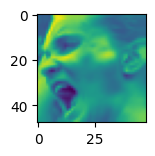

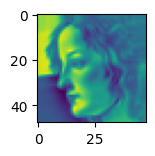

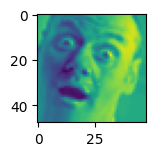

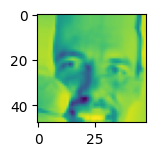

In [23]:
#The code creates an ImageDataGenerator object that includes data augmentation parameters including rotation, width and height shift, shear, zoom, horizontal flip, and fill mode. The generator is then suited to the training data using the fit() technique. Finally, using the flow() method, the generator is used to generate augmented batches of photographs and their accompanying labels, and the first batch of 9 images is visualised using pyplot. However, there appears to be an error in the code, since it displays photographs from X_batch12 rather than X_batch15.
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=12,
      width_shift_range=0.1,                
      height_shift_range=0.05,
      shear_range=0.6,
      zoom_range=0.05,
      horizontal_flip=True,
      fill_mode='nearest')
datagen.fit(X_train)
for X_batch15, y_batch15 in datagen.flow(X_train, y_train, batch_size=100000):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch15[i].reshape(48, 48, 1))
        pyplot.show()
    break

In [24]:
#This code concatenates four arrays along the first axis, X_train, X_batch1, X_batch2, and X_batch15, and assigns the result to a new array X_train2.
X_train2=np.concatenate((X_train,X_batch1,X_batch2,X_batch15))

In [25]:
X_train2.shape

(108000, 48, 48, 1)

In [28]:
#This function concatenates the original training labels y_train with the labels created by data augmentation for batches y_batch1, y_batch2, and y_batch15, and stores the resulting concatenation in y_train2.
y_train2=np.concatenate((y_train,y_batch1,y_batch2,y_batch15))

In [ ]:
#Concatenates multiple batches of image data to the training set along the first axis.
X_train1=np.concatenate((X_train,X_batch1,X_batch2,X_batch5,X_batch6,X_batch7,X_batch8,X_batch9,X_batch10,X_batch11,X_batch12,X_batch13,X_batch15),axis=0)

In [ ]:
#Returns array dimensions.
X_train1.shape

(351000, 48, 48, 1)

In [ ]:
#y_train1 is formed by concatenating y_train with batches.
y_train1=np.concatenate((y_train,y_batch1,y_batch2,y_batch5,y_batch6,y_batch7,y_batch8,y_batch9,y_batch10,y_batch11,y_batch12,y_batch13,y_batch15),axis=0)

In [32]:
#Create learning rate reduction and early stopping callbacks.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,verbose = 1,factor = 0.50, min_lr = 1e-10)



es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=20)

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error

# build MLP model
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=50, random_state=42)

# reshape input data to have 2 dimensions
x_train = X_train2.reshape(X_train2.shape[0], -1)
x_test = X_val.reshape(X_val.shape[0], -1)

# train model
model.fit(x_train,y_train2)

# evaluate model on test set
y_pred = model.predict(x_test)
# accuracy = accuracy_score(x_test, y_val)
# print('Test accuracy:', accuracy)
mse = mean_squared_error(y_pred, y_val)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.1439285714285714


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
#Normal CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
l2 = tf.keras.regularizers.L2
l1=tf.keras.regularizers.L1
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
kernel_init = tf.keras.initializers.GlorotNormal()

# Define input shape
input_shape = (48, 48, 1)

# Define the model architecture
model = keras.Sequential([
    
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=21),input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2),),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

  

    layers.Conv2D(256, (3, 3), activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

 


    layers.Conv2D(512, (3, 3), activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=6),),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),


    layers.Flatten(),
    layers.Dense(512, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=5)),
    layers.Dropout(0.4),

    layers.Dense(256, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=6),kernel_regularizer=l2(0.005)),
    layers.Dropout(0.2),

    layers.Dense(7, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
optimizer=tf.keras.optimizers.experimental.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_CNN=model
# Print model summary
#model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                        

In [ ]:
model_CNN.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 24s 6ms/step - loss: 1.9051 - accuracy: 0.3233 - val_loss: 1.3034 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 21s 6ms/step - loss: 1.5117 - accuracy: 0.4199 - val_loss: 1.2562 - val_accuracy: 0.5160 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 21s 6ms/step - loss: 1.4262 - accuracy: 0.4552 - val_loss: 1.1495 - val_accuracy: 0.5715 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 24s 7ms/step - loss: 1.3636 - accuracy: 0.4808 - val_loss: 1.1743 - val_accuracy: 0.5770 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 21s 6ms/step - loss: 1.3061 - accuracy: 0.5053 - val_loss: 1.1215 - val_accuracy: 0.5985 - lr: 0.0010


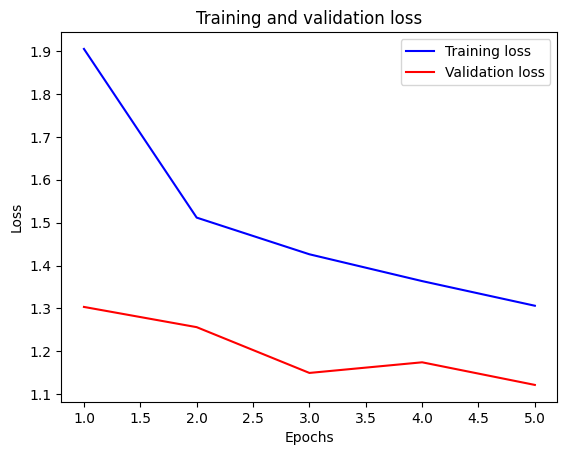

In [ ]:
# Extract losses from model training history
train_loss = model_CNN.history.history['loss']
val_loss = model_CNN.history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

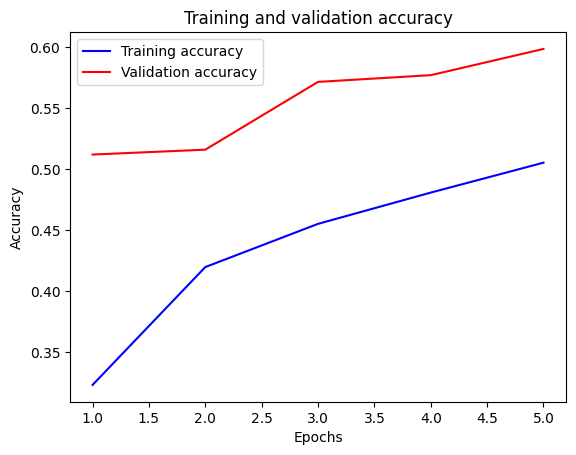

In [ ]:
# Extract accuracies from model training history
train_loss = model_CNN.history.history['accuracy']
val_loss = model_CNN.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = model_CNN.evaluate(X_train2, y_train2, verbose=0)
test_scores = model_CNN.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)


              Metric     Score      Mean  Std Dev
0      Training Loss  1.167382  1.167382      0.0
1  Training Accuracy  0.564472  0.564472      0.0
2       Testing Loss  1.121507  1.121507      0.0
3   Testing Accuracy  0.598500  0.598500      0.0


In [37]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model_deep=model
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model_deep.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 41s 8ms/step - loss: 1.8137 - accuracy: 0.2861 - val_loss: 1.3773 - val_accuracy: 0.4630 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 27s 8ms/step - loss: 1.5185 - accuracy: 0.3991 - val_loss: 1.2128 - val_accuracy: 0.5295 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 27s 8ms/step - loss: 1.4207 - accuracy: 0.4408 - val_loss: 1.1005 - val_accuracy: 0.5805 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 27s 8ms/step - loss: 1.3563 - accuracy: 0.4686 - val_loss: 1.0546 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 27s 8ms/step - loss: 1.3041 - accuracy: 0.4893 - val_loss: 1.0120 - val_accuracy: 0.6050 - lr: 0.0010


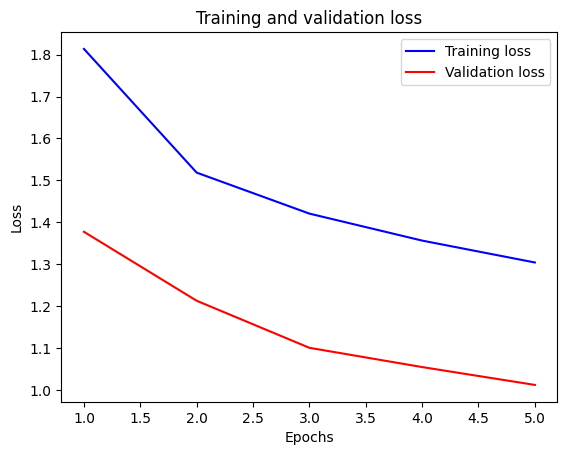

In [ ]:
# Extract losses from model training history
train_loss = model_deep.history.history['loss']
val_loss = model_deep.history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

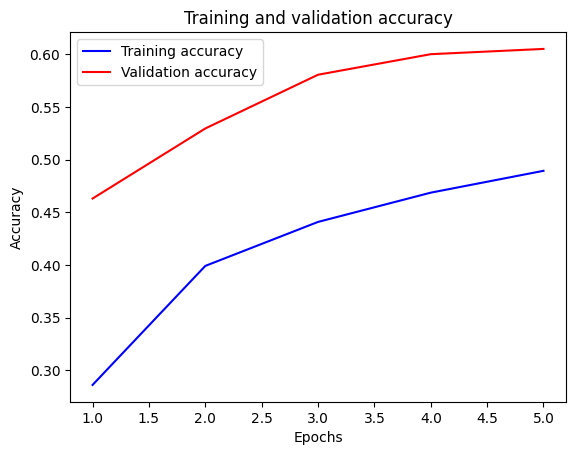

In [ ]:
# Extract accuracies from model training history
train_loss = model_deep.history.history['accuracy']
val_loss = model_deep.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = model_deep.evaluate(X_train2, y_train2, verbose=0)
test_scores = model_deep.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.169493  1.169493      0.0
1  Training Accuracy  0.546759  0.546759      0.0
2       Testing Loss  1.011950  1.011950      0.0
3   Testing Accuracy  0.605000  0.605000      0.0


In [ ]:
#Bayesian Optimization


!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import BayesianOptimization

def build_model(hp):
    model = keras.Sequential()
    
    # Add a convolutional layer with variable number of filters, kernel size and padding
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        padding='same',
        activation='relu',
        input_shape=(48, 48, 1)
    ))


    
    # Add a batch normalization layer
    model.add(layers.BatchNormalization())
    
    # Add another convolutional layer with variable number of filters, kernel size and padding
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=512, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        padding='same',
        activation='relu'
    ))

    model.add(layers.BatchNormalization())
    
    # Add a max pooling layer with variable pool size
    model.add(layers.MaxPooling2D(
        pool_size=hp.Choice('pool_1_size', values=[2,3]),
        strides=2
    ))

    model.add(Dropout(hp.Choice('dropout_1_rate',values=[0.2,0.6])))
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filters', min_value=64, max_value=512, step=32),
        kernel_size=hp.Choice('conv_3_kernel', values=[3,5]),
        padding='same',
        activation='relu'
    ))
     
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(
        filters=hp.Int('conv_4_filters', min_value=64, max_value=512, step=32),
        kernel_size=hp.Choice('conv_4_kernel', values=[3,5]),
        padding='same',
        activation='relu'
    ))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(
        pool_size=hp.Choice('pool_2_size', values=[2,3]),
        strides=2
    ))
    model.add(Dropout(hp.Choice('dropout_2_rate',values=[0.2,0.6])))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_5_filters', min_value=64, max_value=512, step=32),
        kernel_size=hp.Choice('conv_5_kernel', values=[3,5]),
        padding='same',
        activation='relu'
    ))
     
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(
        filters=hp.Int('conv_6_filters', min_value=64, max_value=512, step=32),
        kernel_size=hp.Choice('conv_6_kernel', values=[3,5]),
        padding='same',
        activation='relu'
    ))
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D(
        pool_size=hp.Choice('pool_3_size', values=[2,3]),
        strides=2
    ))

    model.add(Dropout(hp.Choice('dropout_3_rate',values=[0.2,0.6])))
    

    
    
    
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    model.add(Dense(hp.Int('Fully_connected_dense', min_value=64, max_value=512, step=32), activation='relu'))
# Add a seventh batch normalization layer
    model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
    model.add(Dropout(hp.Choice('dropout_3_rate',values=[0.2,0.6])))
    

  
    # Add an output layer with 7 units (one for each emotion category) and softmax activation function
    model.add(layers.Dense(7, activation='softmax'))

    # Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

tuner = BayesianOptimization(
build_model,
objective='val_accuracy',
max_trials=5
)

tuner.search(X_train2, y_train2, epochs=7, validation_data=(X_val, y_val))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model_bayes = build_model(best_hps)
model_bayes.compile(loss='categorical_crossentropy',
optimizer=Adam(best_hps.get('learning_rate')),
metrics=['accuracy'])
model_bayes.fit(X_train2, y_train2, epochs=5, validation_data=(X_val, y_val))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-46-8455132e9ec9>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


Epoch 1/5
3375/3375 [==============================] - 100s 28ms/step - loss: 1.7147 - accuracy: 0.3146 - val_loss: 1.3145 - val_accuracy: 0.4925
Epoch 2/5
3375/3375 [==============================] - 93s 28ms/step - loss: 1.4284 - accuracy: 0.4367 - val_loss: 1.0987 - val_accuracy: 0.5750
Epoch 3/5
3375/3375 [==============================] - 93s 28ms/step - loss: 1.3125 - accuracy: 0.4849 - val_loss: 1.0379 - val_accuracy: 0.6085
Epoch 4/5
3375/3375 [==============================] - 93s 28ms/step - loss: 1.2286 - accuracy: 0.5194 - val_loss: 0.9830 - val_accuracy: 0.6275
Epoch 5/5
3375/3375 [==============================] - 93s 28ms/step - loss: 1.1512 - accuracy: 0.5507 - val_loss: 0.9710 - val_accuracy: 0.6350


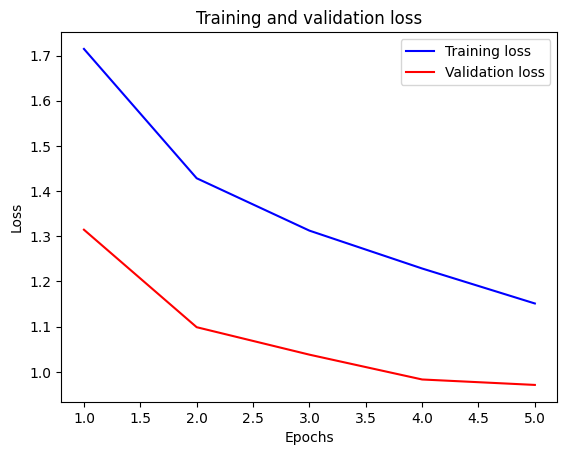

In [ ]:
# Extract accuracies from model training history
train_loss = model_bayes.history.history['loss']
val_loss = model_bayes.history.history['val_loss']


# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

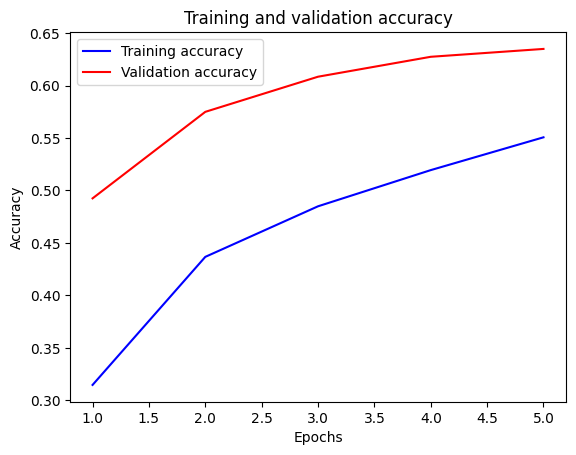

In [ ]:
# Extract accuracies from model training history
train_loss = model_bayes.history.history['accuracy']
val_loss = model_bayes.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = model_bayes.evaluate(X_train2, y_train2, verbose=0)
test_scores = model_bayes.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  0.974819  0.974819      0.0
1  Training Accuracy  0.624278  0.624278      0.0
2       Testing Loss  0.970960  0.970960      0.0
3   Testing Accuracy  0.635000  0.635000      0.0


In [ ]:
#Ensemble
nets = 10
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (48, 48, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
    model[j].add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
    model[j].add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
    model[j].add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
    model[j].add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
    model[j].add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
    model[j].add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
    model[j].add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
    model[j].add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
    model[j].add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
    model[j].add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
    model[j].add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
    model[j].add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
    model[j].add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
    model[j].add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
    model[j].add(Dropout(0.25))

# Flatten the output of the convolutional layers
    model[j].add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
    model[j].add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
    model[j].add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
    model[j].add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
    model[j].add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
    model[j].compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
#Ensemble(Same deep model 10 times)
models=model
model_input = tf.keras.Input(shape=(48, 48, 1)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)
ensemble_model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])


In [ ]:
ensemble_model.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 256s 60ms/step - loss: 1.7968 - accuracy: 0.2669 - val_loss: 1.6841 - val_accuracy: 0.3520 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 200s 59ms/step - loss: 1.7250 - accuracy: 0.3153 - val_loss: 1.5568 - val_accuracy: 0.4190 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 199s 59ms/step - loss: 1.6682 - accuracy: 0.3476 - val_loss: 1.4830 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 200s 59ms/step - loss: 1.6161 - accuracy: 0.3805 - val_loss: 1.4343 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 199s 59ms/step - loss: 1.5780 - accuracy: 0.4003 - val_loss: 1.3845 - val_accuracy: 0.5020 - lr: 0.0010


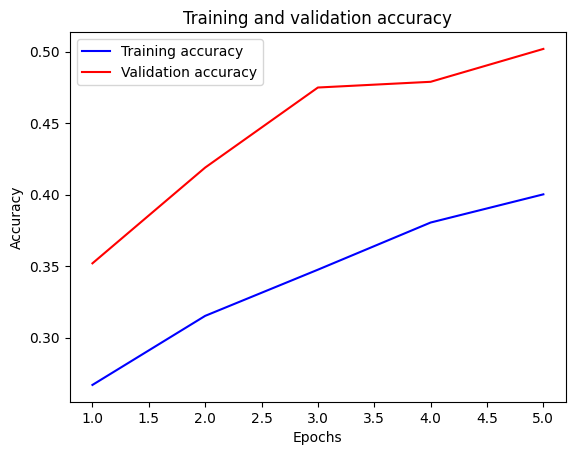

In [ ]:
# Extract accuracies from model training history
train_loss = ensemble_model.history.history['accuracy']
val_loss = ensemble_model.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = ensemble_model.evaluate(X_train2, y_train2, verbose=0)
test_scores = ensemble_model.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.537355  1.537355      0.0
1  Training Accuracy  0.420824  0.420824      0.0
2       Testing Loss  1.384540  1.384540      0.0
3   Testing Accuracy  0.502000  0.502000      0.0


In [ ]:
#Transfer learning Inception
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
l2 = tf.keras.regularizers.L2
l1=tf.keras.regularizers.L1
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
kernel_init = tf.keras.initializers.LecunUniform()

# Define input shape
input_shape = (48, 48, 1)

# Define the base model
base_model = tf.keras.applications.InceptionV3(
    input_shape=(75,75,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Define the model architecture
model = keras.Sequential([
    layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=input_shape),
    layers.experimental.preprocessing.Resizing(75, 75),
    base_model,

    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax'),

])

# Compile the model with categorical cross-entropy loss and Adam optimizer
optimizer=tf.keras.optimizers.experimental.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()
inception=model


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 48, 48, 3)         0         
                                                                 
 resizing (Resizing)         (None, 75, 75, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               524544    
                                                      

In [ ]:
inception.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 43s 11ms/step - loss: 1.7772 - accuracy: 0.2763 - val_loss: 1.6808 - val_accuracy: 0.3220 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 37s 11ms/step - loss: 1.7373 - accuracy: 0.2893 - val_loss: 1.6597 - val_accuracy: 0.3225 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 35s 10ms/step - loss: 1.7247 - accuracy: 0.2955 - val_loss: 1.6603 - val_accuracy: 0.3290 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 36s 11ms/step - loss: 1.7148 - accuracy: 0.2990 - val_loss: 1.6451 - val_accuracy: 0.3325 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 35s 11ms/step - loss: 1.7066 - accuracy: 0.3033 - val_loss: 1.6549 - val_accuracy: 0.3240 - lr: 0.0010


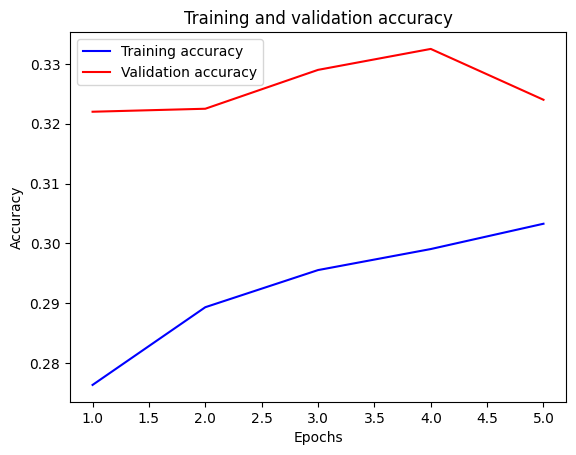

In [ ]:
# Extract accuracies from model training history
train_loss = inception.history.history['accuracy']
val_loss = inception.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

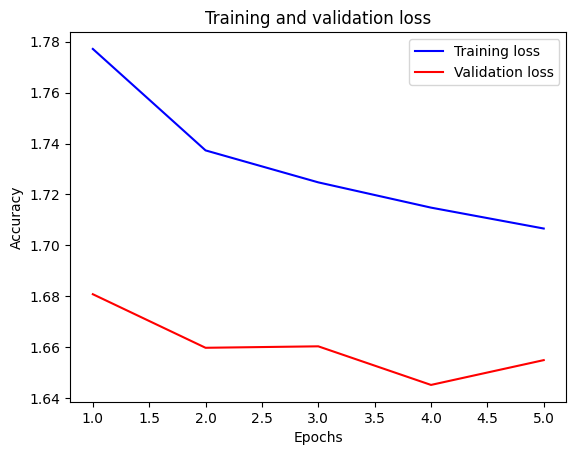

In [ ]:
# Extract accuracies from model training history
train_loss = inception.history.history['loss']
val_loss = inception.history.history['val_loss']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = inception.evaluate(X_train2, y_train2, verbose=0)
test_scores = inception.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.658386  1.658386      0.0
1  Training Accuracy  0.331380  0.331380      0.0
2       Testing Loss  1.644682  1.644682      0.0
3   Testing Accuracy  0.344500  0.344500      0.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
#Resnet
# Create ResNet50 base model with pretrained weights
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build model architecture on top of base model
model = Sequential()
model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(48,48,1)))
model.add(layers.Lambda(lambda image: tf.image.resize(image, (224, 224))))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
resnet=model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 48, 48, 3)         0         
                                                                 
 lambda_4 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               524544    
                                                      

In [ ]:
resnet.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 109s 31ms/step - loss: 1.7890 - accuracy: 0.2587 - val_loss: 1.6999 - val_accuracy: 0.3345 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 103s 30ms/step - loss: 1.7579 - accuracy: 0.2790 - val_loss: 1.6707 - val_accuracy: 0.3190 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 103s 30ms/step - loss: 1.7490 - accuracy: 0.2817 - val_loss: 1.6599 - val_accuracy: 0.3295 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 103s 31ms/step - loss: 1.7440 - accuracy: 0.2846 - val_loss: 1.6762 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - ETA: 0s - loss: 1.7359 - accuracy: 0.2874
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
3375/3375 [==============================] - 103s 30ms/step - loss: 1.7359 - accuracy: 0.2874 - val_loss: 1.6624 - val_accuracy: 0.3250 - lr: 0.0010


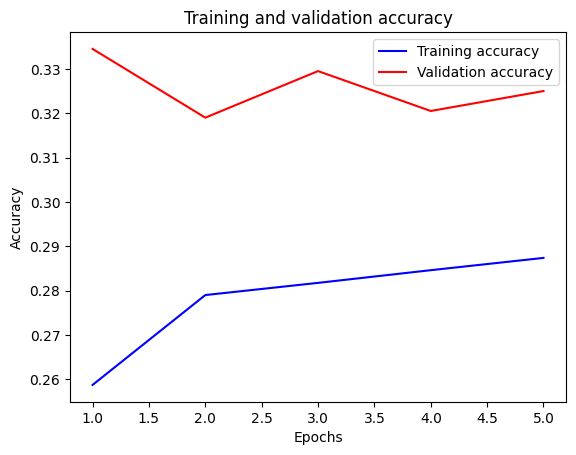

In [ ]:
# Extract accuracies from model training history
train_loss = resnet.history.history['accuracy']
val_loss = resnet.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

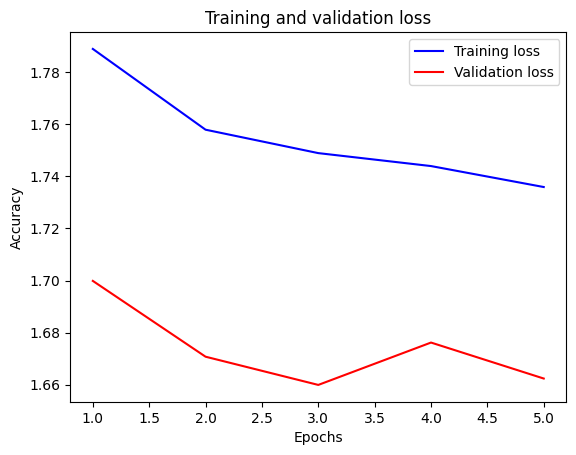

In [ ]:
# Extract accuracies from model training history
train_loss = resnet.history.history['loss']
val_loss = resnet.history.history['val_loss']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = resnet.evaluate(X_train2, y_train2, verbose=0)
test_scores = resnet.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.705958  1.705958      0.0
1  Training Accuracy  0.307083  0.307083      0.0
2       Testing Loss  1.662355  1.662355      0.0
3   Testing Accuracy  0.325000  0.325000      0.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#VGG16
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build model architecture on top of base model
model = Sequential()
model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(48,48,1)))
model.add(layers.Lambda(lambda image: tf.image.resize(image, (224, 224))))
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_VGG=model
# Print model summary
model_VGG.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 48, 48, 3)         0         
                                                                 
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_112 (Ba  (None, 25088)            100352    
 tchNormalization)                                               
                                                      

In [ ]:
model_VGG.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 153s 44ms/step - loss: 1.7172 - accuracy: 0.3104 - val_loss: 1.3827 - val_accuracy: 0.4935 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 149s 44ms/step - loss: 1.6123 - accuracy: 0.3641 - val_loss: 1.3403 - val_accuracy: 0.5145 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 149s 44ms/step - loss: 1.5741 - accuracy: 0.3824 - val_loss: 1.2803 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 149s 44ms/step - loss: 1.5511 - accuracy: 0.3939 - val_loss: 1.2713 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 150s 44ms/step - loss: 1.5365 - accuracy: 0.3998 - val_loss: 1.2640 - val_accuracy: 0.5290 - lr: 0.0010


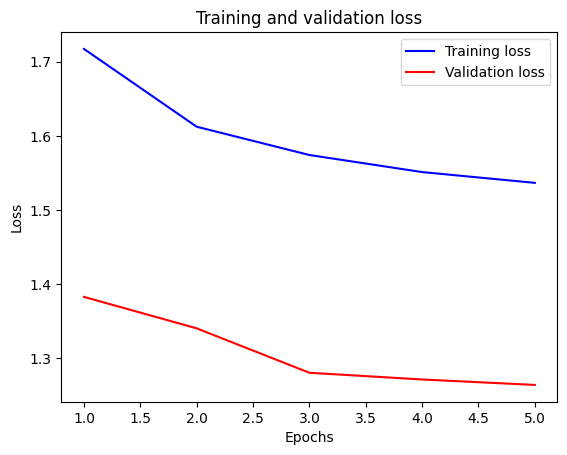

In [ ]:
# Extract accuracies from model training history
train_loss = model_VGG.history.history['loss']
val_loss = model_VGG.history.history['val_loss']


# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

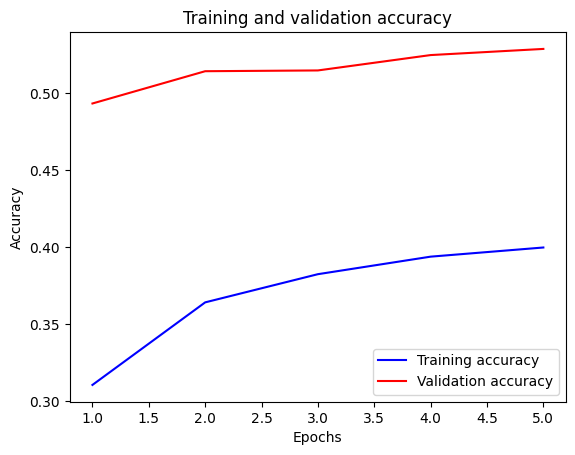

In [ ]:
# Extract accuracies from model training history
train_loss = model_VGG.history.history['accuracy']
val_loss = model_VGG.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = model_VGG.evaluate(X_train2, y_train2, verbose=0)
test_scores = model_VGG.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.393742  1.393742      0.0
1  Training Accuracy  0.471917  0.471917      0.0
2       Testing Loss  1.263955  1.263955      0.0
3   Testing Accuracy  0.529000  0.529000      0.0


In [ ]:
#Ensemble model if you wanna try ensembling different models
models1=[resnet,model_bayes,model_VGG]
model_input = tf.keras.Input(shape=(48, 48, 1))
model_outputs = [model(model_input) for model in models1] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model2 = tf.keras.Model(inputs=model_input, outputs=ensemble_output)
ensemble_model2.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])


In [ ]:
#Learning rate reduction and early stopping callbacks.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,verbose = 1,factor = 0.50, min_lr = 1e-10)



es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=20)

In [ ]:
#Fit ensemble model with callbacks.
ensemble_model2.fit(X_train2,y_train2,validation_data=(X_val,y_val),epochs=5,verbose=1,callbacks=[lrd,es])

Epoch 1/5
3375/3375 [==============================] - 341s 101ms/step - loss: 1.3403 - accuracy: 0.5515 - val_loss: 1.1480 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 2/5
3375/3375 [==============================] - 339s 101ms/step - loss: 1.2809 - accuracy: 0.5653 - val_loss: 1.1193 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 3/5
3375/3375 [==============================] - 339s 101ms/step - loss: 1.2455 - accuracy: 0.5790 - val_loss: 1.0965 - val_accuracy: 0.6455 - lr: 0.0010
Epoch 4/5
3375/3375 [==============================] - 339s 100ms/step - loss: 1.2207 - accuracy: 0.5889 - val_loss: 1.1007 - val_accuracy: 0.6440 - lr: 0.0010
Epoch 5/5
3375/3375 [==============================] - 339s 100ms/step - loss: 1.1971 - accuracy: 0.6016 - val_loss: 1.0938 - val_accuracy: 0.6395 - lr: 0.0010


In [ ]:
# Extract accuracies from model training history
train_loss = ensemble_model2.history.history['accuracy']
val_loss = ensemble_model2.history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Evaluate model_CNN on training and testing data
train_scores = ensemble_model2.evaluate(X_train2, y_train2, verbose=0)
test_scores = ensemble_model2.evaluate(X_val, y_val, verbose=0)

# Extract loss and accuracy from scores
train_loss = train_scores[0]
train_acc = train_scores[1]
test_loss = test_scores[0]
test_acc = test_scores[1]

# Calculate mean and standard deviation of scores
mean_train_loss = np.mean(train_loss)
mean_train_acc = np.mean(train_acc)
mean_test_loss = np.mean(test_loss)
mean_test_acc = np.mean(test_acc)
std_train_loss = np.std(train_loss)
std_train_acc = np.std(train_acc)
std_test_loss = np.std(test_loss)
std_test_acc = np.std(test_acc)

# Create a pandas DataFrame to present the results in a table
results_df = pd.DataFrame({'Metric': ['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                           'Score': [train_loss, train_acc, test_loss, test_acc],
                           'Mean': [mean_train_loss, mean_train_acc, mean_test_loss, mean_test_acc],
                           'Std Dev': [std_train_loss, std_train_acc, std_test_loss, std_test_acc]})

# Print the results DataFrame
print(results_df)

              Metric     Score      Mean  Std Dev
0      Training Loss  1.068653  1.068653      0.0
1  Training Accuracy  0.669241  0.669241      0.0
2       Testing Loss  1.093816  1.093816      0.0
3   Testing Accuracy  0.639500  0.639500      0.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link1 = 'https://drive.google.com/file/d/1Jr89SBNo8wCq7yTqny4q_Y8toex1zeBE/view?usp=share_link'
id1 = link1.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id1})
downloaded.GetContentFile('my_emotion_test.csv') 
 
dftest = pd.read_csv('my_emotion_test.csv')
print(dftest)


         id                                             pixels
0       640  123 109 128 142 103 113 145 179 178 158 177 19...
1      6081  41 41 41 41 42 42 42 45 39 16 10 10 7 9 9 5 8 ...
2     11137  248 228 211 197 194 181 195 180 185 189 193 18...
3      6793  158 181 192 200 193 179 133 167 219 211 164 19...
4      5932  195 185 166 165 149 98 89 83 65 183 75 65 67 6...
...     ...                                                ...
6882   6836  106 31 6 2 0 0 0 0 0 2 1 0 0 1 1 0 3 10 15 17 ...
6883  18291  154 237 247 243 232 245 255 254 248 240 234 22...
6884  17438  31 32 44 57 58 49 26 50 96 112 121 124 126 126...
6885  15967  74 79 85 97 107 114 134 145 152 160 157 175 16...
6886  14096  18 26 14 6 10 12 8 7 7 8 9 4 4 7 7 7 5 6 8 9 5...

[6887 rows x 2 columns]


In [ ]:
#This code retrieves the 'id' column from the 'dftest' DataFrame.
dftest['id']

0         640
1        6081
2       11137
3        6793
4        5932
        ...  
6882     6836
6883    18291
6884    17438
6885    15967
6886    14096
Name: id, Length: 6887, dtype: int64

In [ ]:
#Create dataframe from dftest with two columns.
tem1=dftest[['pixels','id']]

In [ ]:
#Converts 'id' column to a numpy array.
id=((dftest['id']).to_numpy())

In [ ]:
id

array([  640,  6081, 11137, ..., 17438, 15967, 14096])

In [ ]:
#Converts variable to array.
id=np.asarray(id)

In [ ]:
id

array([  640,  6081, 11137, ..., 17438, 15967, 14096])

In [ ]:
#Reshape the array id into a column vector.
id=id.reshape(-1,1)

In [ ]:
id

array([[  640],
       [ 6081],
       [11137],
       ...,
       [17438],
       [15967],
       [14096]])

In [ ]:
#Creates a zero-filled 2D numpy array with shape (number of rows in dftest, 48x48).
pixels1=np.zeros((dftest.shape[0], 48*48))

In [ ]:
#Choose the 'pixels' column from the 'dftest' dataframe and save it to the 'tem1' variable.
tem1=dftest['pixels']

In [ ]:
#This code block converts the pixel values in string format to integer format and stores them in a numpy array called 'pixels1' for each image in the test dataset.
for ix in range(pixels1.shape[0]):
    t = tem1[ix].split(' ')
    for iy in range(pixels1.shape[1]):
        pixels1[ix, iy] = int(t[iy])

In [ ]:
#Standardizes pixel values in pixels1.
pixels1 -= np.mean(pixels1, axis=0)
pixels1 /= np.std(pixels1, axis=0)

In [ ]:
#Reshape 1D array to 4D array.
pixels1=pixels1.reshape(-1,48,48,1)

In [ ]:
#pixels1.shape returns the array pixels1's form.
pixels1.shape

(6887, 48, 48, 1)

In [ ]:
X_test=pixels1

In [ ]:
# We use the best model (Bayes optimized Deep CNN) to make predictions, Just change model_deep.predict
#to any other i.e model_bayes.predict to try other models.

In [ ]:
#Predict the output labels for test data using the trained model.
results=model.predict(X_test)

216/216 [==============================] - 8s 37ms/step


In [ ]:
#Returns the shape of the array "results".
results.shape

(6887, 7)

In [ ]:
results

array([[1.9036596e-01, 3.4275807e-02, 1.7842545e-01, ..., 3.7833560e-01,
        1.6249740e-02, 1.4396788e-01],
       [1.0632747e-01, 1.6077433e-02, 6.4861141e-02, ..., 1.0239246e-01,
        3.7720349e-02, 9.1634482e-02],
       [2.2929532e-02, 7.2660181e-04, 1.8229537e-01, ..., 1.0077306e-02,
        7.4950910e-01, 1.7876489e-02],
       ...,
       [1.2284371e-01, 1.3507361e-02, 1.7828530e-01, ..., 1.7005092e-01,
        1.5063049e-01, 2.7297422e-01],
       [1.3190499e-01, 5.8045653e-03, 7.7779971e-02, ..., 2.4102136e-01,
        1.1678354e-02, 4.5841342e-01],
       [4.0032908e-01, 6.6915289e-02, 1.9451009e-01, ..., 1.4507897e-01,
        3.5016738e-02, 3.9311998e-02]], dtype=float32)

In [ ]:
#To get projected labels, get the highest likelihood index for each row in the results.
pred_labels = np.argmax(results, axis=1)

In [ ]:
#The length of the pred_labels array is returned.
len(pred_labels)

6887

In [ ]:
#Changing the pred_labels array to a 2D array with a single column.
pred_labels=pred_labels.reshape(-1,1)

In [ ]:
#Numpy array of predicted labels.
pred_labels

array([[4],
       [3],
       [5],
       ...,
       [6],
       [6],
       [0]])

In [ ]:
#This line creates a new 2D array pred by stacking the id and pred_labels arrays as columns.
pred=np.column_stack((id,pred_labels))

In [ ]:
pred

array([[  640,     4],
       [ 6081,     3],
       [11137,     5],
       ...,
       [17438,     6],
       [15967,     6],
       [14096,     0]])

In [ ]:
df_final = pd.DataFrame(pred, columns=['id', 'emotion'])

In [ ]:
df_final

,id,emotion
0,640,4
1,6081,3
2,11137,5
3,6793,3
4,5932,5
...,...,...
6882,6836,6
6883,18291,3
6884,17438,6
6885,15967,6


In [ ]:
#This line of code creates a Pandas DataFrame named df_final with two columns named 'id' and 'emotion', respectively, and fills it with the data from the pred NumPy array.
df_final.to_csv('predictionsemotionfinal.csv', index=False)